# Student Performance Indicator

* This project understands how the student's performance (test scores) is affected by other variables.  
* This data consist of 8 column and 1000 rows.

### Dataset information  
* gender: sex of students -> (Male/female)  
* race/ethnicity: ethnicity of students -> (Group A, B,C, D,E)  
* parental level of education : parents' final education -> (bachelor's degree, some college, master's degree, associate's degree,high school)  
* lunch: having lunch before test (standard or free/reduced)  
* test preparation course: complete or not complete before test  
* math score  
* reading score  
* writing score  

## Import data and required packages

* Packages

In [211]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

* Data

In [2]:
df = pd.read_csv('data/stud.csv')

* Top 5 records

In [4]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


* Shape of the dataset

In [5]:
df.shape

(1000, 8)

## Data Checkup

* Missing values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

*No missing values.*

* Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

*No duplicated values*

* Data Types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


*Categorical and numerical values*

* Nb Unique values

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Data Exploring

* Statistics

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.0890,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.1690,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.0540,15.195657,10.0,57.75,69.0,79.0,100.0
total_score,1000.0,203.3120,42.771978,27.0,175.00,205.0,233.0,300.0
average_score,1000.0,40.6624,8.554396,5.4,35.00,41.0,46.6,60.0


**Insight**  
* All means are very close to each other
* All standard deviations are very close to each other
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17  
---------------------------------------------------------------------------------------------------------------------------------------

* Class

In [108]:
cat_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch','test_preparation_course', 'math_score']
for i in cat_columns:
    cat_class = df[i].unique()
    print(f'Categories in {i} variable: \n{cat_class}\n')



Categories in gender variable: 
['female' 'male']

Categories in race_ethnicity variable: 
['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education variable: 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch variable: 
['standard' 'free/reduced']

Categories in test_preparation_course variable: 
['none' 'completed']

Categories in math_score variable: 
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]



* Divide numerical and categorical features

In [109]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'Numerical features: {numeric_features} \nCategorical features: {categorical_features}')

Numerical features: ['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score'] 
Categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


* Create target features 'total_score' and 'average_score'

In [110]:
len(numeric_features)

5

In [111]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = round(df['total_score']/len(numeric_features), 2)

df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,43.6
1,female,group C,some college,standard,completed,69,90,88,247,49.4
2,female,group B,master's degree,standard,none,90,95,93,278,55.6
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,29.6
4,male,group C,some college,standard,none,76,78,75,229,45.8


*'total_score' and 'average_score' are the **target variables** to predict.*  

* **Count Func**

In [112]:
def count_students(df:pd.DataFrame, numeric_features:list, target_variable:str, condition:str) -> list:
    count_student = []
    for feature in numeric_features:
        if (condition.lower() == 'full_score'):
            full_mark_count = df[df[feature] == 100][target_variable].count()
            count_student.append((feature, int(full_mark_count)))
        if (condition.lower() == 'less_20'):
            full_mark_count = df[df[feature] <= 20][target_variable].count()
            count_student.append((feature, int(full_mark_count)))
    return count_student

def count_cat_values(df:pd.DataFrame, categorical_features:list) -> list:
    cat_values = []
    for feature in categorical_features:
        cat_values.append(df[feature].value_counts())

    return cat_values
        

* **Number of students with full marks**

In [113]:
count_students(df, numeric_features, 'average_score', 'full_Score')

[('math_score', 7),
 ('reading_score', 17),
 ('writing_score', 14),
 ('total_score', 0),
 ('average_score', 0)]

**Insight**  
* Students with fully marked **math score = 7** are 2 times less frequent than fully marked students in **writing = 14** and **reading = 17**.  
---------------------------------------------------------------------------------------------------------------------------------------

* **Nb Students with score < 20**

In [114]:
count_students(df, numeric_features, 'average_score', 'less_20')

[('math_score', 4),
 ('reading_score', 1),
 ('writing_score', 3),
 ('total_score', 0),
 ('average_score', 15)]

**Insight**  
* Students are doing better in reading = 1 student with a score less than 20.
* The era where students are worst are math = 4 and writing = 3.  
---------------------------------------------------------------------------------------------------------------------------------------

* **Count values for each class**

In [115]:
count_cat_values(df, categorical_features)[-1]

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

**Insight**
* **Gender**: 518 female, 482 male. No gender bias
* **race_ethnicity**: Group C = 319 almost 3.6 time most frequent than Group A = 89. race_ethnicity bias. 
* **parental_level_of_education** : Students with parental level of education 'some college' = 226, 'associate's degree' = 222 are approximatively 3.8 time more frequent than those with master's degree parental level of education.
* **parental_level_of_education** : Students with parental level of education 'some college' = 226, 'associate's degree' = 222 are approximatively 2 time more frequent than those with bachelor's degree parental level of education.
* **lunch**: Students with standard lunch = 645 are approximatively 2 time more frequent than those with free/reduced lunch = 355.
* **test_preparation_course**: Students who has completed test preparation course = 358 are approximatively 2 time less frequent than those who had not done test preparation course = 642.

---------------------------------------------------------------------------------------------------------------------------------------

## Exploring data (Visualization)

### Average score distribution in classes

* Histogram with KDE

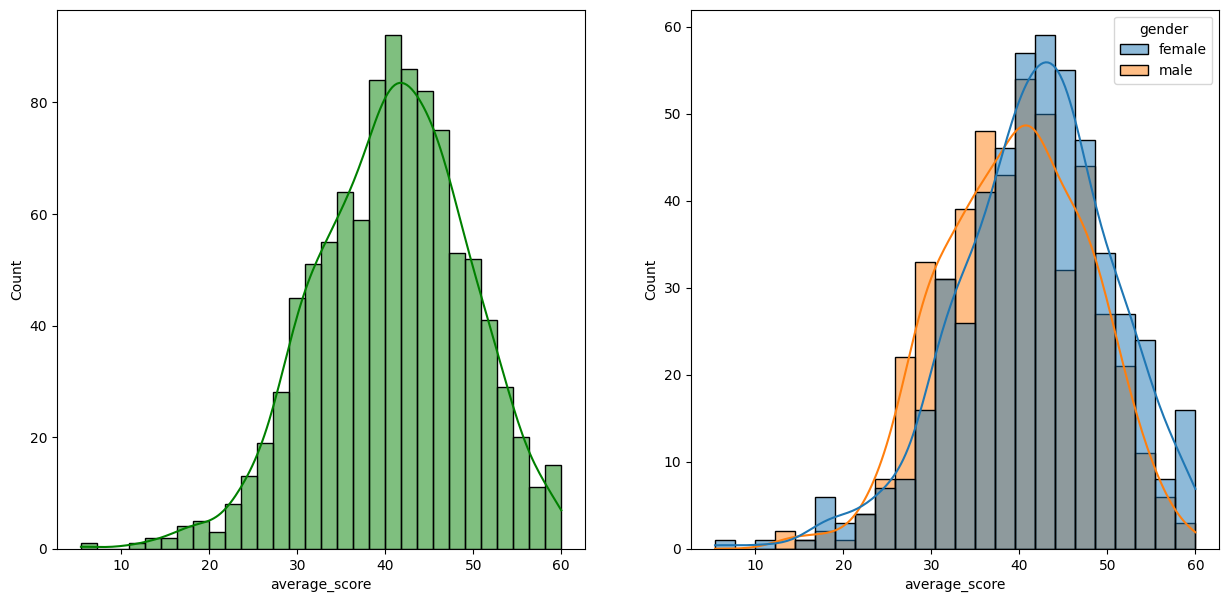

In [132]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')

plt.show()

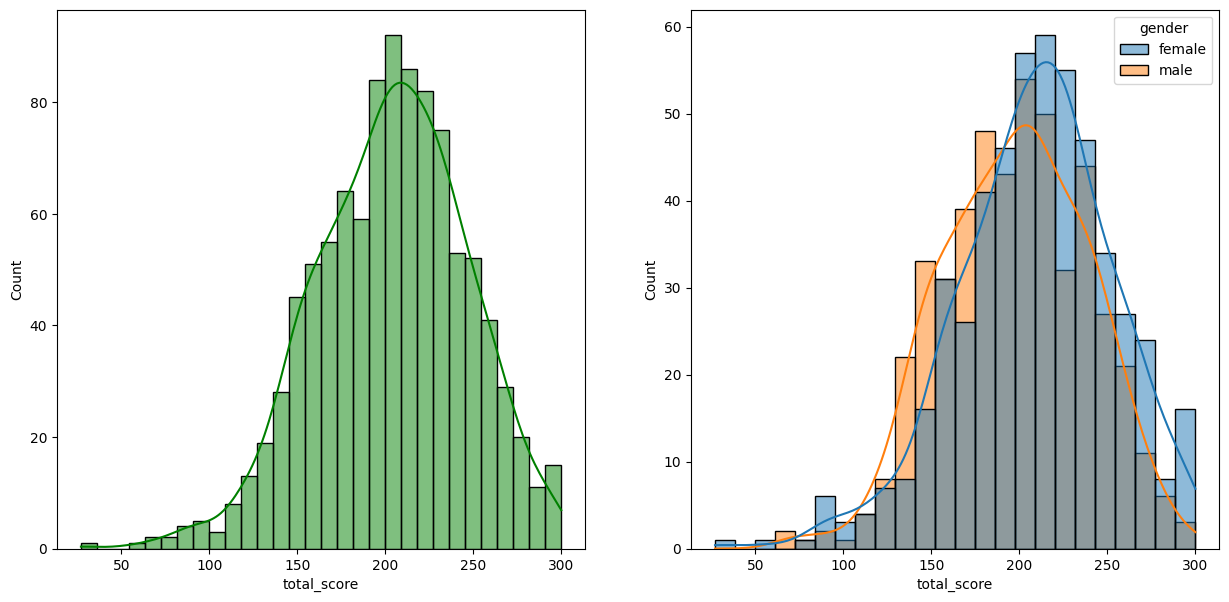

In [138]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')

plt.show()

**Insight**:
* Female students tend to perfom well then male students.
____________________________________________________________________________________________________________________________________________

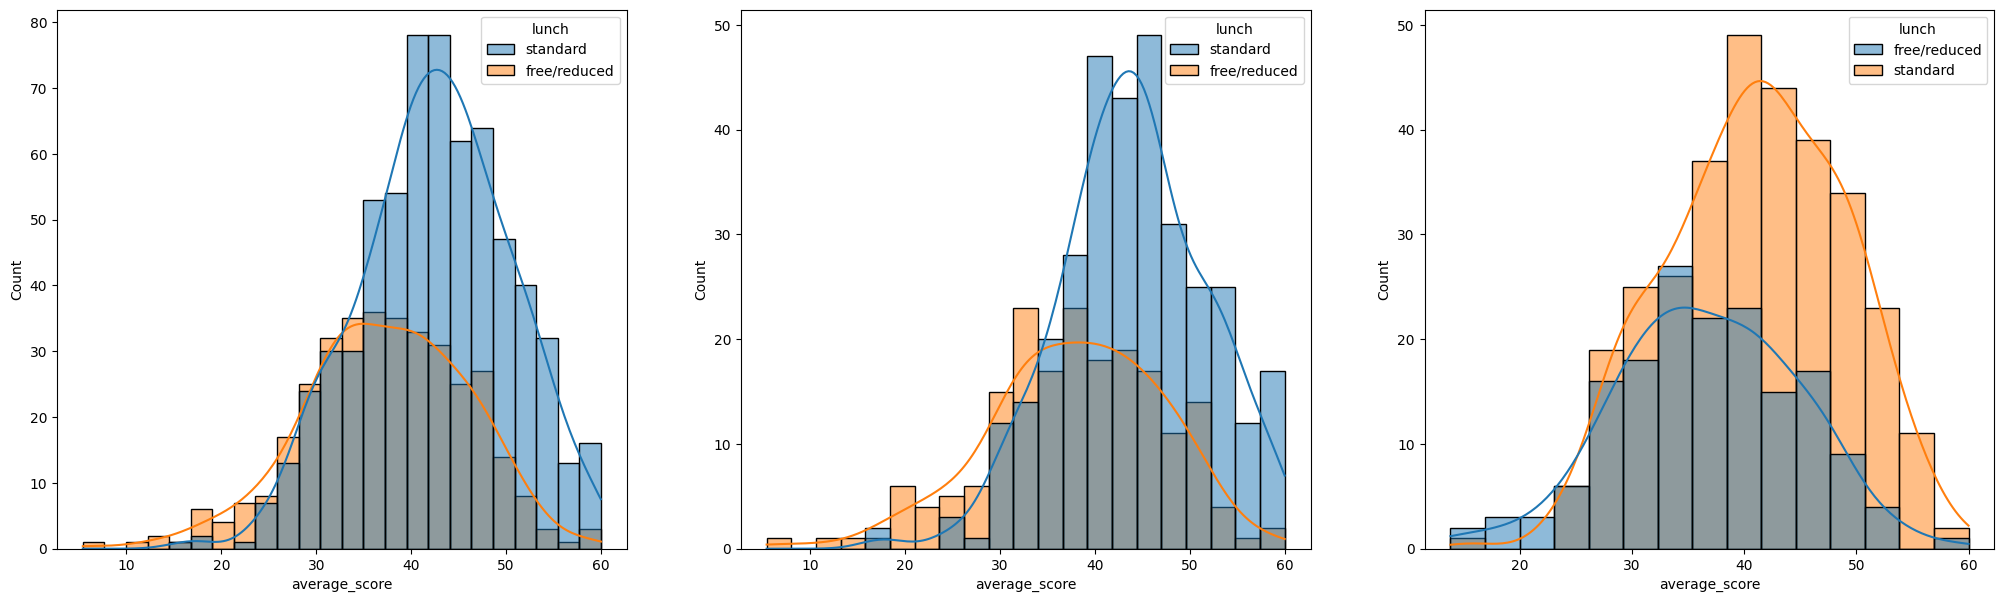

In [142]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')

plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='lunch')

plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='lunch')

plt.show()

**Insight:**
* Standard Lunch helps perform well in exams.
* Standard Lunch helps perform well in exams be it a male or a female.
____________________________________________________________________________________________________________________________________________

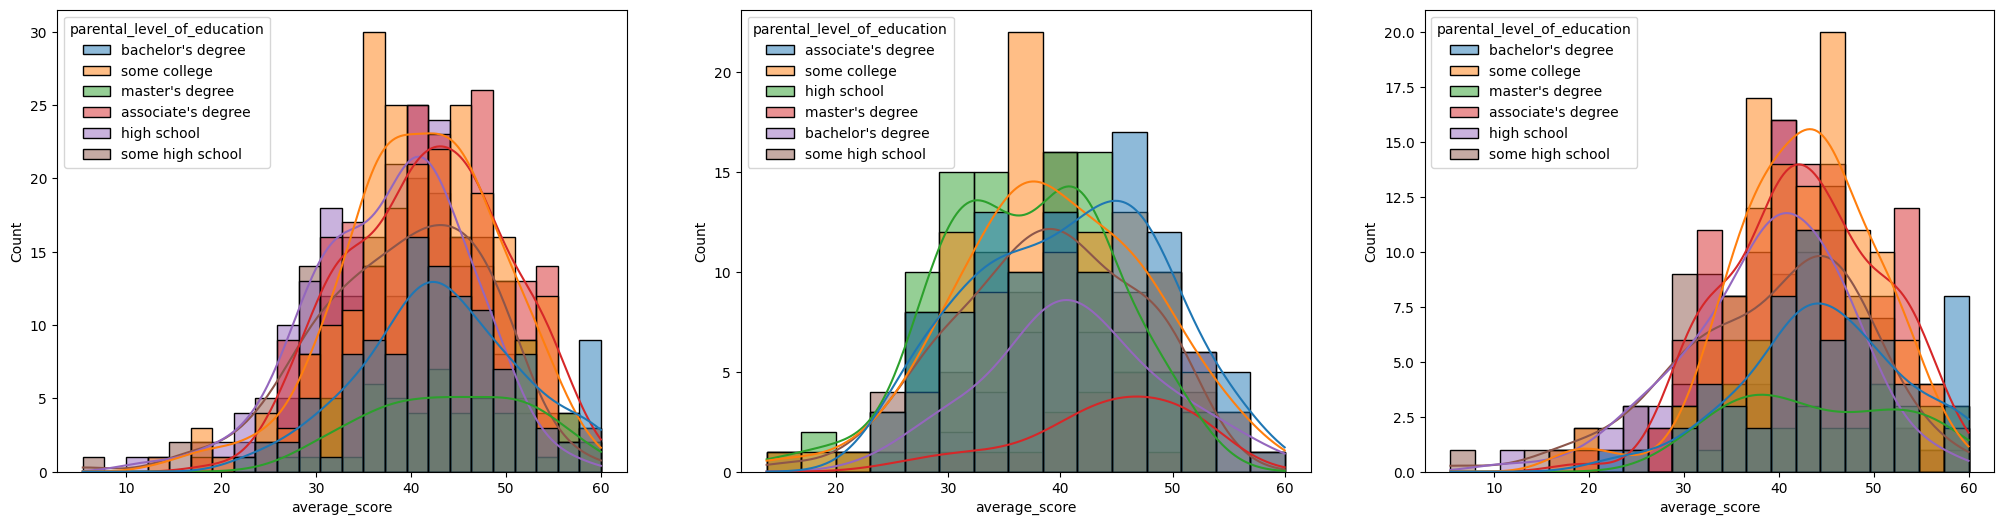

In [176]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax = sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
# plt.show()

**Insights:**
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.
____________________________________________________________________________________________________________________________________________

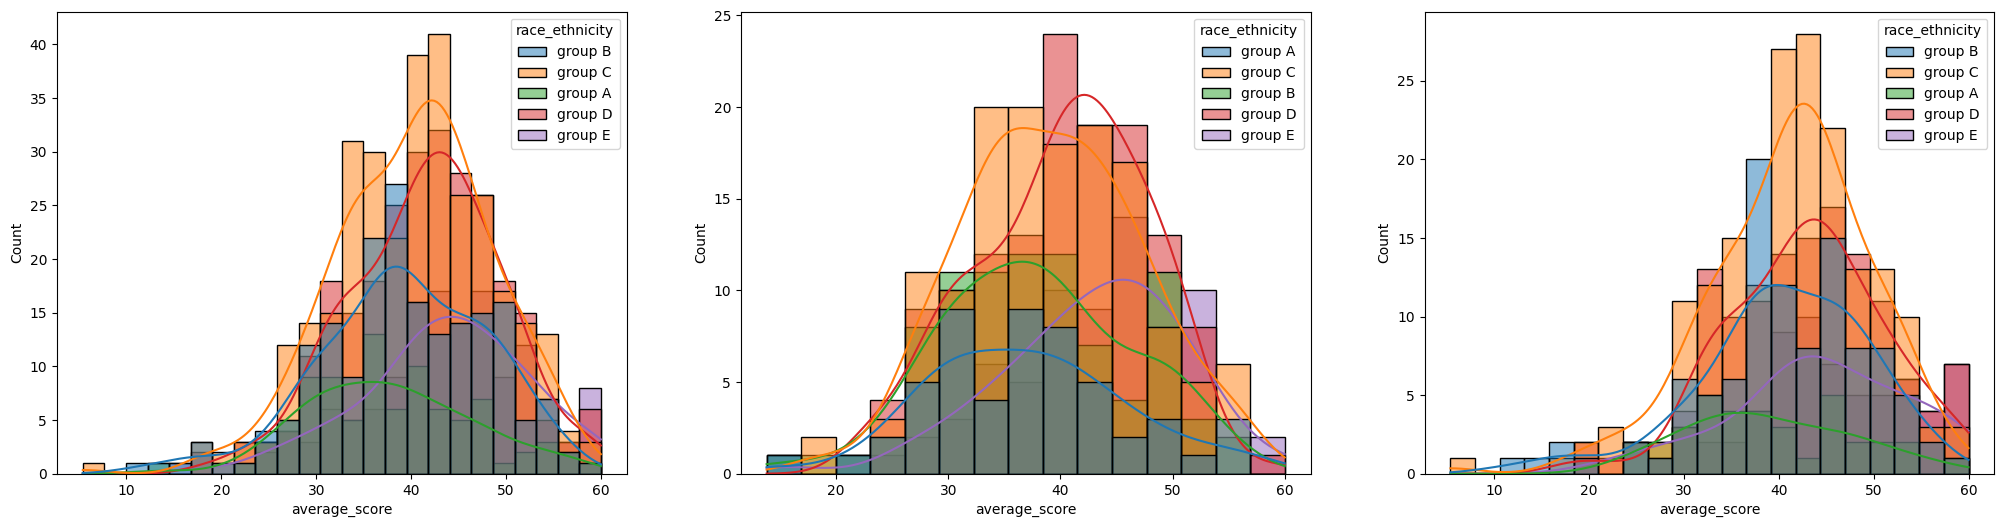

In [177]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax = sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')

**Insights**
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female
____________________________________________________________________________________________________________________________________________

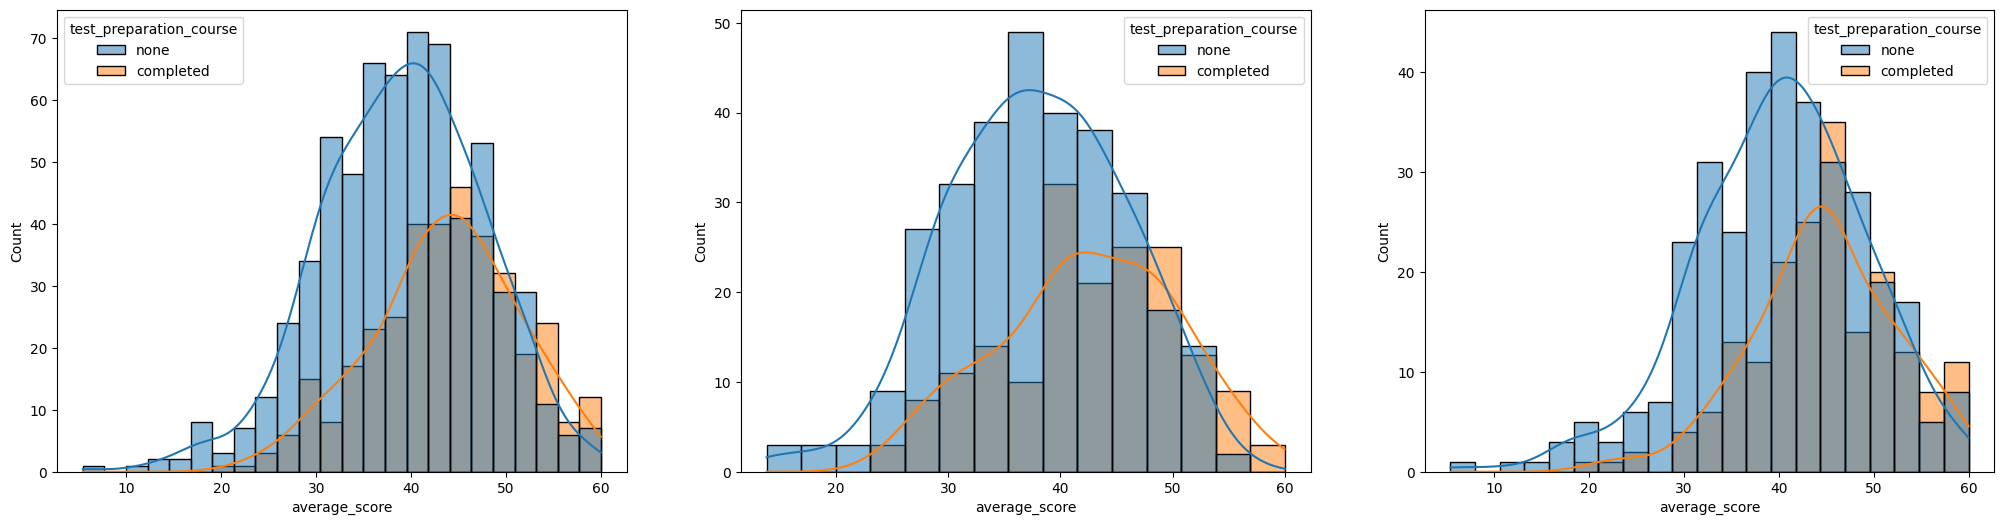

In [178]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax = sns.histplot(data=df, x='average_score', kde=True, hue='test_preparation_course')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='test_preparation_course')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='test_preparation_course')

**Insights**  
* Students who has completed test preparation course tends to perform well in exams be it a male or a female.
________________________________________________________________________________________________________________

### Categorical features class distribution

* **Pieplot**

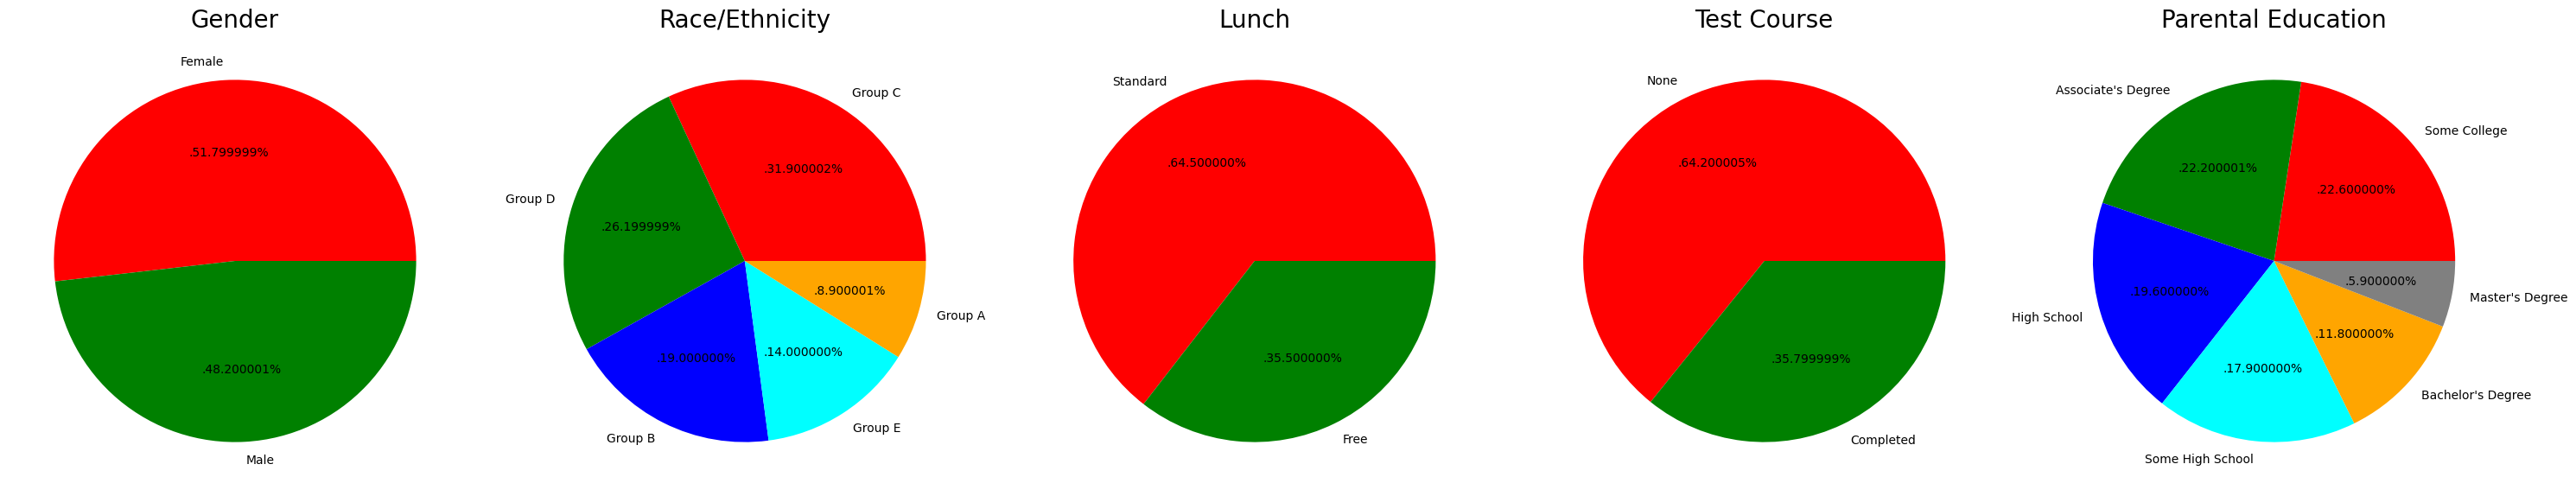

In [193]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


**Insights**
* Number of Male and Female students is almost equal.
* Number students are greatest in Group C.
* Number of students who have standard lunch are greater.
* Number of students who have not enrolled in any test preparation course is greater.
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree".
_________________

### Numerical features distribution

* **Violin plot**

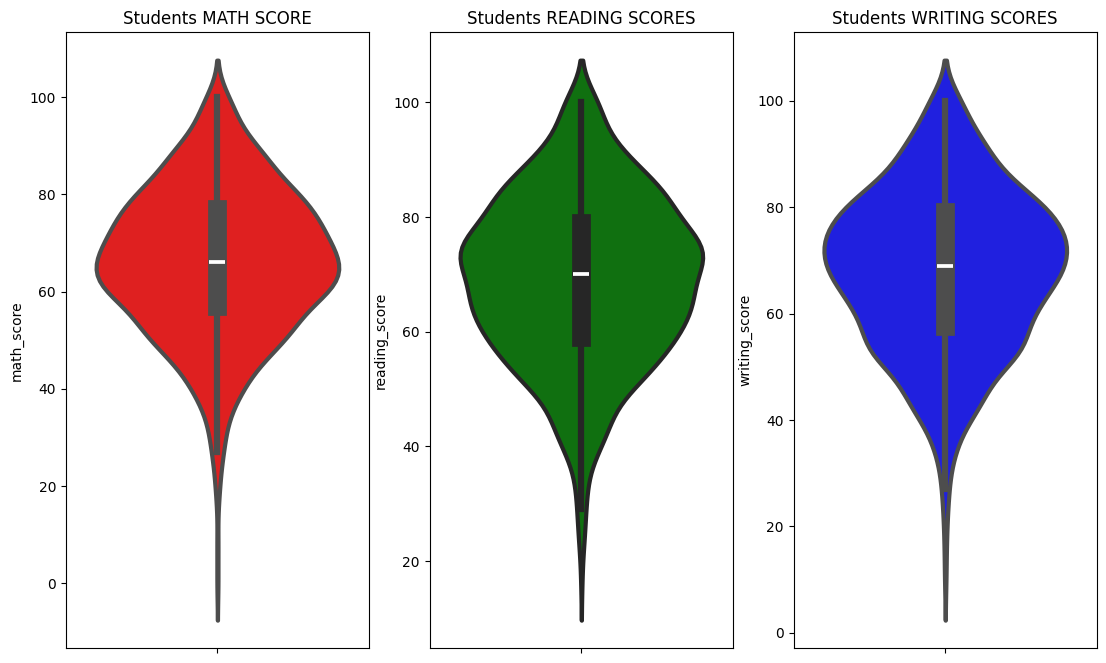

In [192]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Students MATH SCORE')
sns.violinplot(data=df, y='math_score', linewidth=3, color='red')

plt.subplot(1, 4, 2)
plt.title('Students READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('Students WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)

plt.show()

**Insights**
* From the above three plots its clearly visible that most of the students score in between 50-80
____________________________________________________________

### Feature Wise Visualization

#### Gender Column

* How is distribution of gender ? (Univariate Analysis)

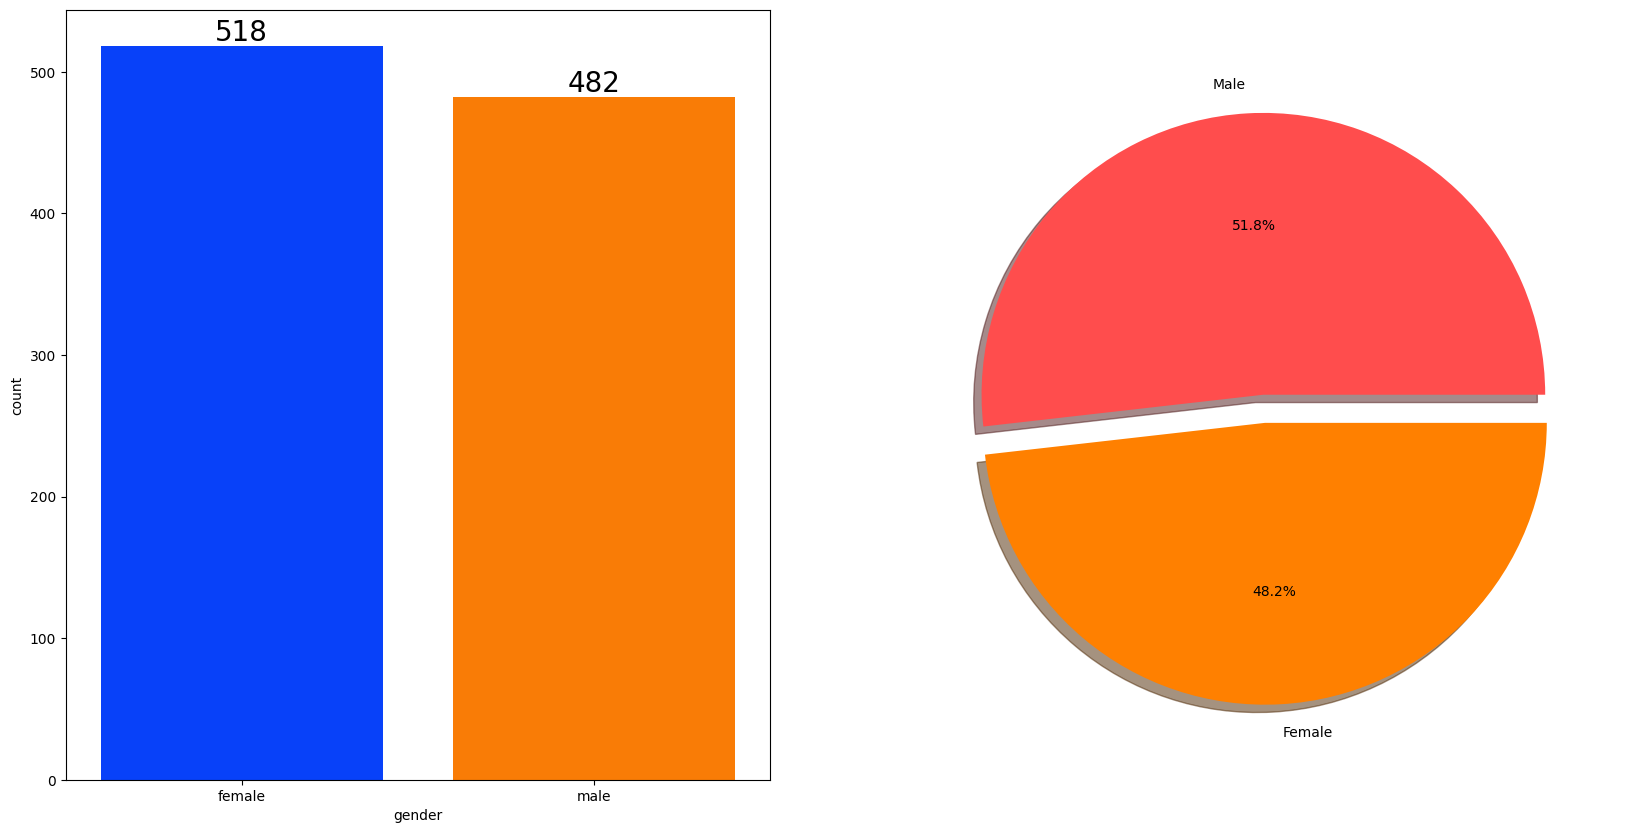

In [232]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['gender'], data=df, palette ='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['gender'].value_counts(), labels=['Male','Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])
plt.show()

**Insights**
* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%).
__________________

* Is gender has any impact on student's performance ? (bivariate Analysis)

In [221]:
gender_group = df.groupby('gender')
gender_group

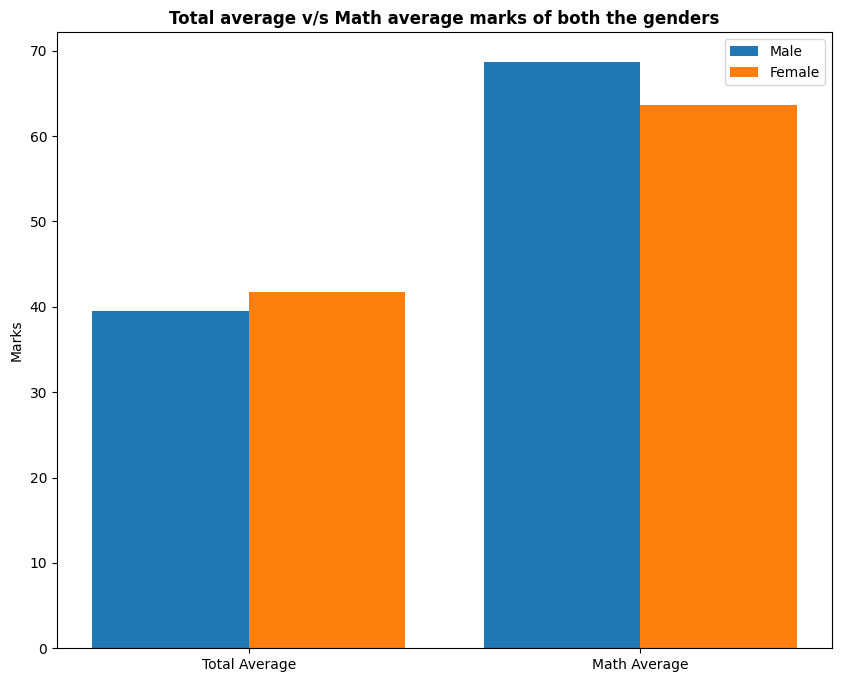

In [234]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']
X_axis = np.arange(len(X))

female_scores = [gender_group['average_score'].mean()[0], gender_group['math_score'].mean()[0]]
male_scores = [gender_group['average_score'].mean()[1], gender_group['math_score'].mean()[1]]

  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**Insights**
* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.
__________________________

#### RACE/EHNICITY COLUMN

* How is Group wise distribution ?

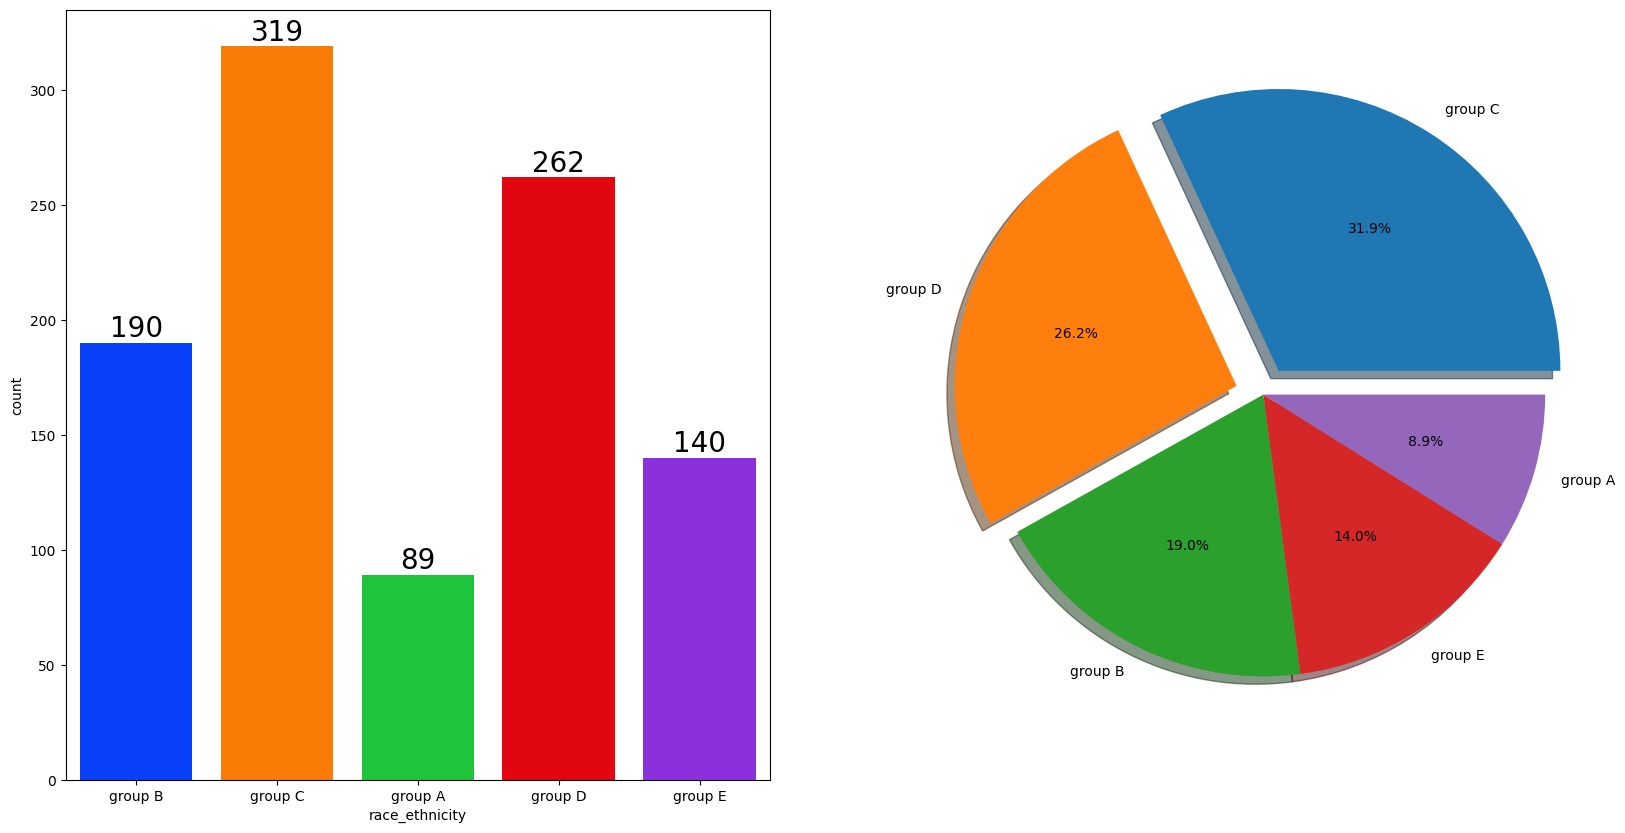

In [247]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1,0.1,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()   

**Insights**
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.
___________________________

* Is Race/Ehnicity has any impact on student's performance ?

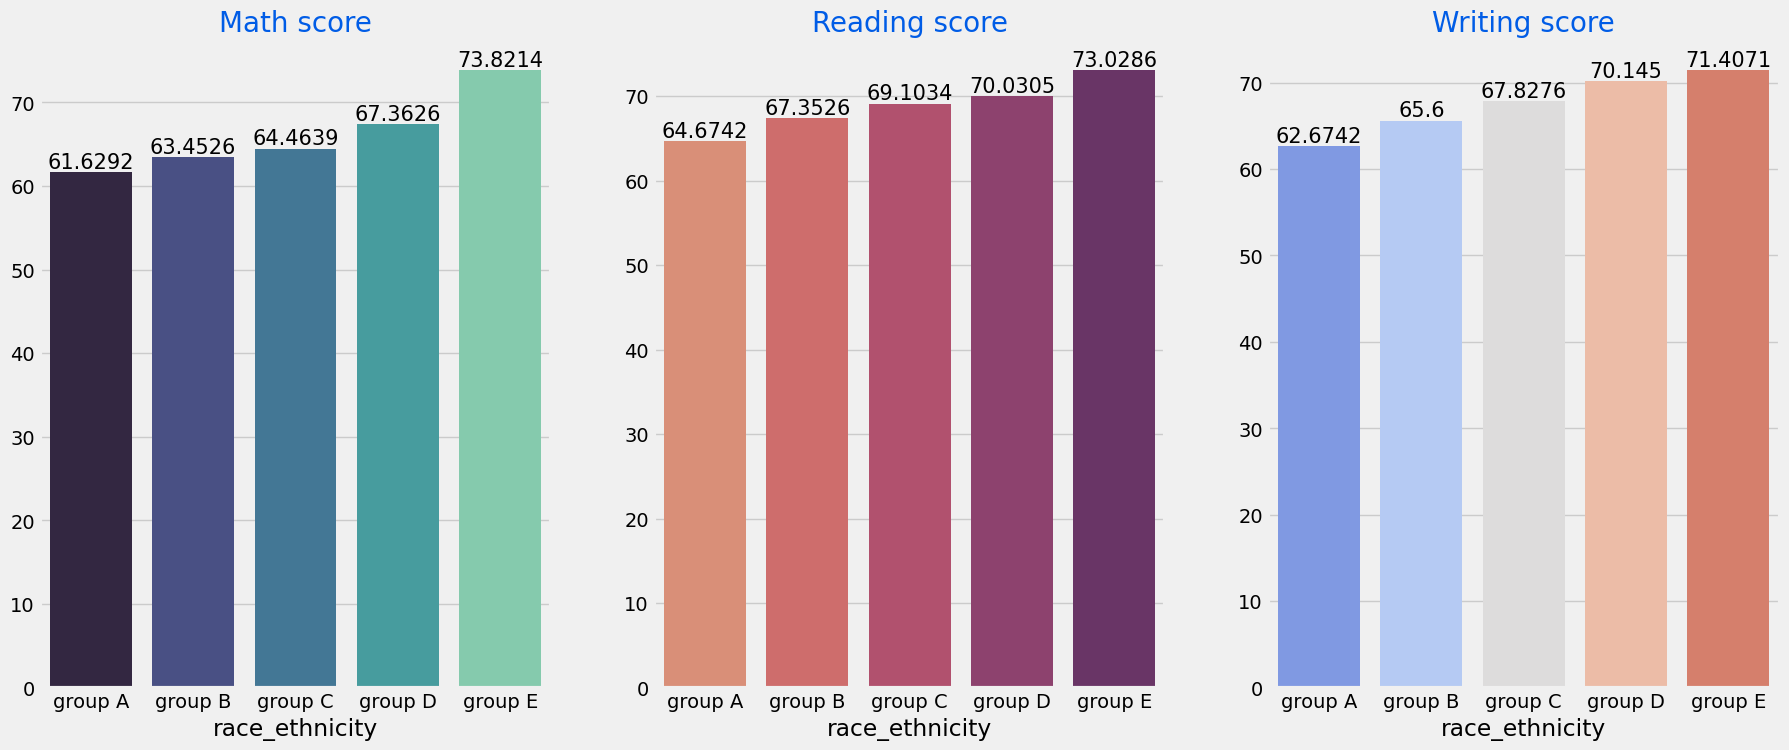

In [285]:
Group_data2 = df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))



sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)



sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)



sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

**Insights**
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects
__________________________

### PARENTAL LEVEL OF EDUCATION COLUMN

* What is educational background of student's parent ? 

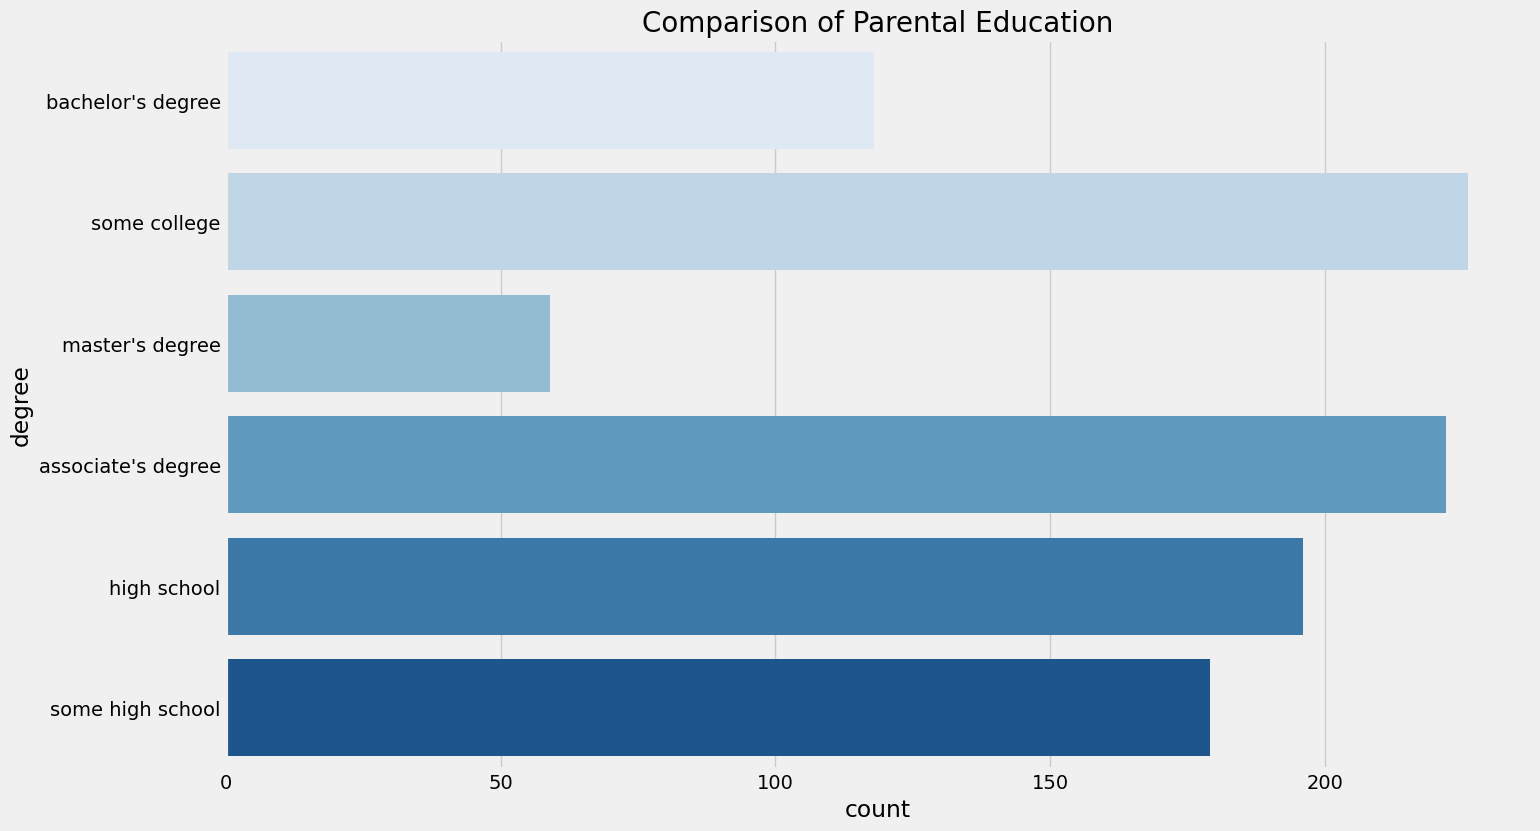

In [259]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(y=df['parental_level_of_education'], palette='Blues')

plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('degree')
plt.show()

**Insights**
* Largest number of parents are from some college and associate's degree.
________________________

#### CHECKING OUTLIERS

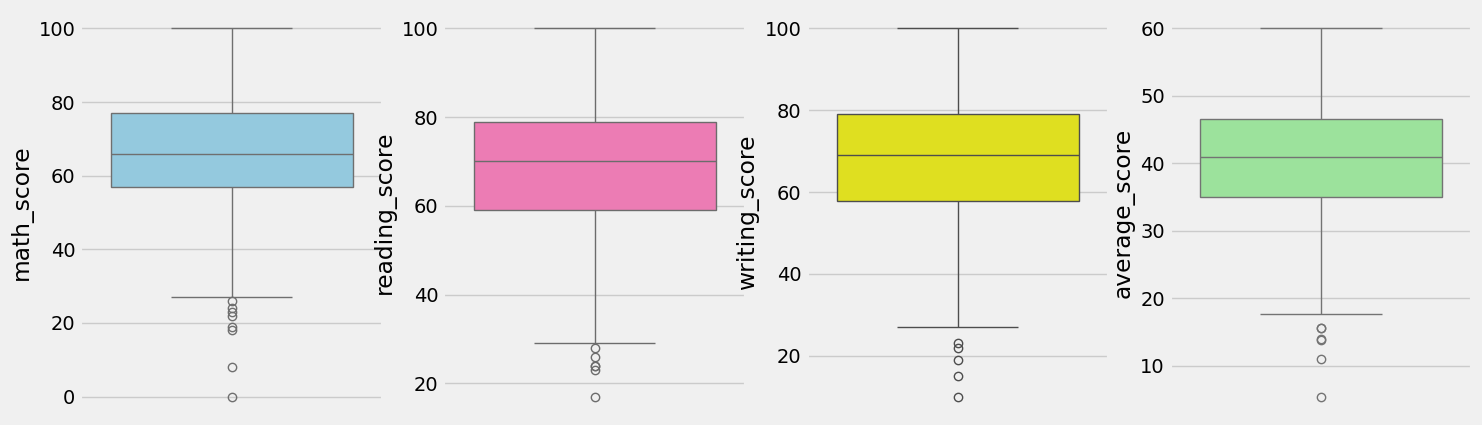

In [283]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

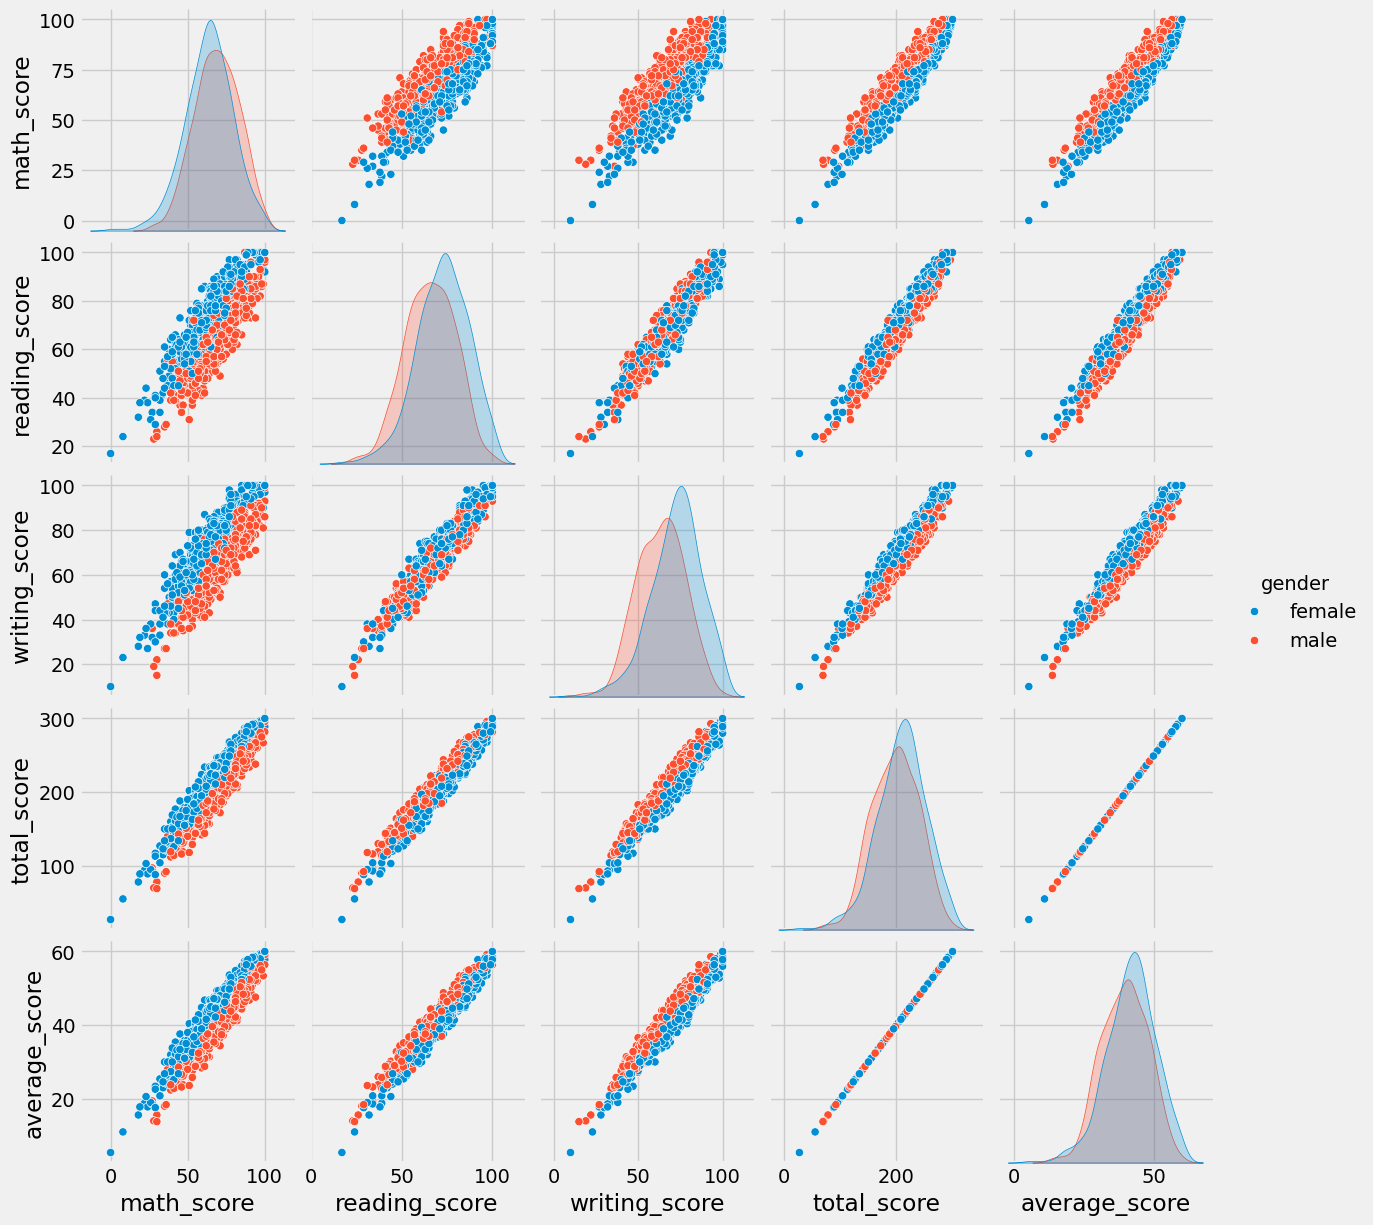

In [ ]:
sns.pairplot(df, hue='gender')
plt.show()

**Insights**
* From the above plot it is clear that all the scores increase linearly with each other.
_______________________________________


# Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.